In [1]:
%run startup.py

In [7]:
from Core.neural_network import NeuralNetwork
from Utils.data_setup import get_data
from Utils.data_preprocessing import to_one_hot, preprocess_images

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [3]:
x_train, y_train = get_data('train')

x_train_normalized = preprocess_images(images=x_train, flatten=True)
y_train_one_hot = to_one_hot(y=y_train, num_classes=10)

x_train_normalized.shape, y_train_one_hot.shape

((60000, 784), (60000, 10))

In [4]:
x_test, y_test = get_data('test')

x_test_normalized = preprocess_images(images=x_test, flatten=True)
y_test_one_hot = to_one_hot(y=y_test, num_classes=10)

x_test_normalized.shape, y_test_one_hot.shape

((10000, 784), (10000, 10))

In [8]:
y_test_indexes = np.argmax(y_test_one_hot, axis=1)

y_test_indexes

array([7, 2, 1, ..., 4, 5, 6])

In [5]:
network = NeuralNetwork()

history = network.fit(
    inputs=x_train_normalized,
    targets=y_train_one_hot,
    epochs=500,
    batch_size=128,
    learning_rate= 0.001,
    patience=20,
    min_improvement=0.001,
    verbose=True
)

Epoch 1/500 - loss: 0.3305 - accuracy: 0.9020
Epoch 2/500 - loss: 0.1137 - accuracy: 0.9651
Epoch 3/500 - loss: 0.0714 - accuracy: 0.9778
Epoch 4/500 - loss: 0.0498 - accuracy: 0.9845
Epoch 5/500 - loss: 0.0367 - accuracy: 0.9884
Epoch 6/500 - loss: 0.0290 - accuracy: 0.9908
Epoch 7/500 - loss: 0.0225 - accuracy: 0.9929
Epoch 8/500 - loss: 0.0191 - accuracy: 0.9938
Epoch 9/500 - loss: 0.0175 - accuracy: 0.9941
Epoch 10/500 - loss: 0.0156 - accuracy: 0.9946
Epoch 11/500 - loss: 0.0140 - accuracy: 0.9952
Epoch 12/500 - loss: 0.0103 - accuracy: 0.9965
Epoch 13/500 - loss: 0.0121 - accuracy: 0.9960
Epoch 14/500 - loss: 0.0140 - accuracy: 0.9954
Epoch 15/500 - loss: 0.0063 - accuracy: 0.9980
Epoch 16/500 - loss: 0.0122 - accuracy: 0.9960
Epoch 17/500 - loss: 0.0099 - accuracy: 0.9968
Epoch 18/500 - loss: 0.0086 - accuracy: 0.9971
Epoch 19/500 - loss: 0.0054 - accuracy: 0.9983
Epoch 20/500 - loss: 0.0091 - accuracy: 0.9970
Epoch 21/500 - loss: 0.0075 - accuracy: 0.9975
Epoch 22/500 - loss: 0

In [9]:
predicts = network.predict(x_test_normalized)

acc = accuracy_score(y_test_indexes, predicts)
print(f'Accuracy at test: {acc:.8f}')

Accuracy at test: 0.98080000


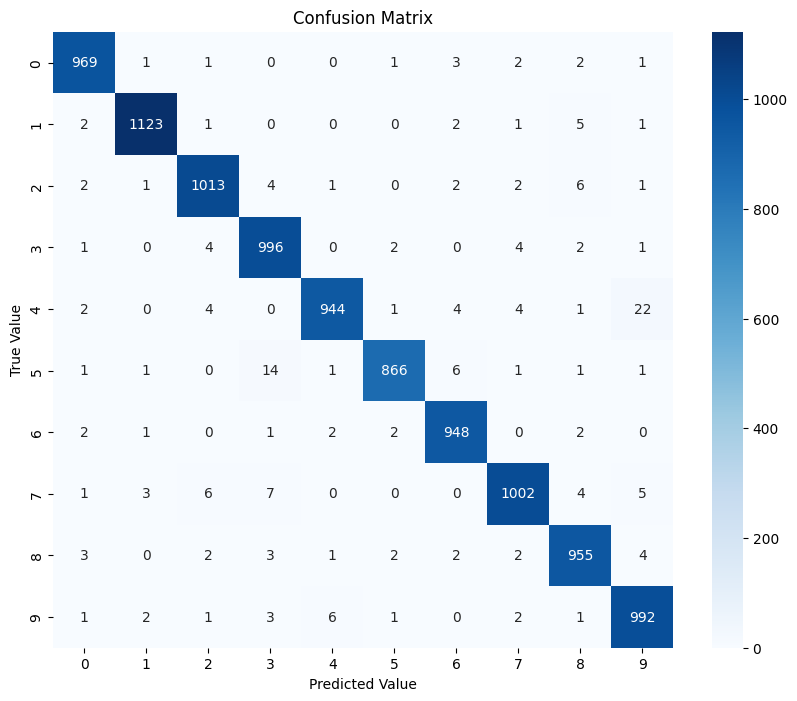

In [10]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test_indexes, predicts)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [11]:
print('Classification Report')
print(classification_report(y_test_indexes, predicts))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



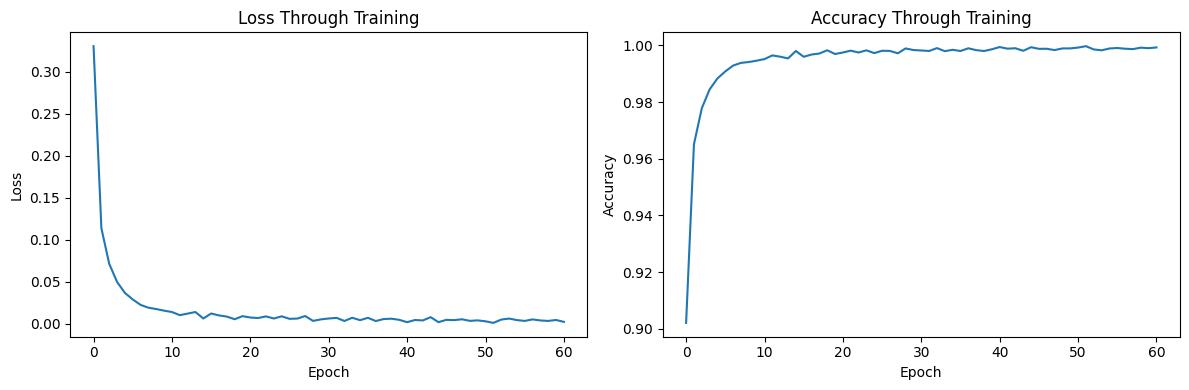

In [12]:
# Plotar histórico de treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Loss Through Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy Through Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()